In [1]:
import pandas as pd
import numpy as np
import seaborn as sb


train = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', nrows=200000)

del train['Id']
train.head()


,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [124]:
pos = train[train['Response']==1]
neg = train[train['Response']==0]

print(pos.shape, neg.shape)


features = pos.columns.values

lines = (set([f.split('_')[0] for f in features]))
stations = (set([f.split('_')[1] for f in features if '_' in f]))


print(stations)
    

(1129, 969) (198871, 969)
{'S37', 'S36', 'S44', 'S23', 'S33', 'S6', 'S26', 'S25', 'S12', 'S9', 'S1', 'S18', 'S27', 'S41', 'S51', 'S38', 'S49', 'S5', 'S19', 'S32', 'S47', 'S21', 'S39', 'S31', 'S10', 'S2', 'S13', 'S28', 'S20', 'S40', 'S3', 'S17', 'S15', 'S43', 'S11', 'S29', 'S22', 'S14', 'S35', 'S48', 'S0', 'S30', 'S50', 'S34', 'S45', 'S24', 'S4', 'S7', 'S8', 'S16'}


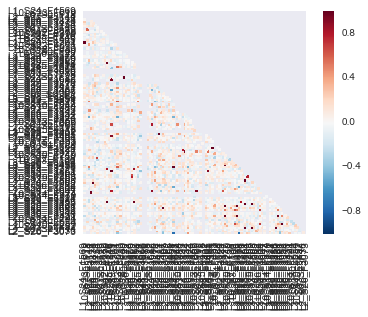

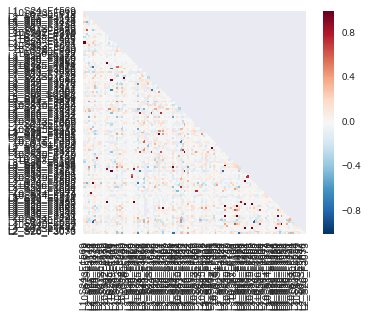

In [231]:

cols = ['L3_S32_F3850','L1_S24_F1672','L1_S24_F1581','L1_S24_F1571','L1_S24_F1846','L3_S33_F3855','L3_S33_F3865','L3_S29_F3407','L3_S33_F3857','L3_S29_F3412','L3_S38_F3956','L3_S40_F3986','L3_S38_F3952','L1_S24_F1844','L3_S29_F3461','L3_S29_F3467','L3_S38_F3960','L3_S29_F3327','L3_S29_F3351','L3_S29_F3370','L3_S30_F3604','L3_S34_F3876','L3_S29_F3336','L3_S30_F3809','L3_S30_F3524','L1_S24_F1565','L3_S33_F3859','L0_S1_F28','L1_S24_F1569','L3_S29_F3373','L1_S24_F1723','L3_S30_F3504','L3_S30_F3554','L3_S29_F3330','L3_S29_F3458','L3_S29_F3436','L3_S43_F4080','L1_S24_F1632','L3_S33_F3863','L0_S0_F16','L1_S24_F1838','L3_S34_F3882','L1_S24_F1842','L3_S41_F4016','L2_S26_F3069','L2_S26_F3117','L3_S29_F3342','L3_S33_F3861','L3_S29_F3430','L3_S30_F3759','L0_S23_F619','L1_S24_F1667','L3_S34_F3878','L3_S30_F3564','L3_S40_F3980','L3_S30_F3704']
# numeric top features
colsnum = ['L3_S32_F3850','L3_S33_F3855','L1_S24_F1723','L3_S33_F3865','L1_S24_F1846','L1_S24_F1695','L3_S38_F3952','L3_S29_F3407','L1_S24_F1604','L1_S24_F1632','L3_S33_F3859','L1_S24_F1565','L0_S3_F100','L0_S6_F122','L1_S24_F1778','L0_S23_F671','L3_S34_F3882','L0_S5_F116','L0_S18_F439','L0_S0_F20','L0_S1_F28','L3_S30_F3544','L3_S29_F3330','L3_S29_F3342','L1_S24_F1838','L3_S30_F3494','L3_S29_F3351','L1_S24_F1647','L3_S29_F3382','L0_S0_F18','L0_S10_F244','L3_S30_F3809','L3_S29_F3461','L0_S14_F374','L3_S30_F3804','L0_S10_F259','L3_S36_F3920','L3_S29_F3336','L0_S14_F370','L0_S11_F294','L0_S10_F219','L0_S2_F60','L2_S26_F3073','L3_S30_F3574','L3_S30_F3609','L0_S6_F132','L0_S2_F44','L0_S19_F455','L3_S30_F3769','L0_S17_F433','L3_S33_F3857','L3_S30_F3689','L3_S29_F3479','L0_S0_F2','L2_S26_F3121','L3_S30_F3754','L2_S27_F3129','L2_S27_F3140','L3_S29_F3373','L0_S13_F356','L2_S27_F3210','L2_S27_F3133','L2_S27_F3144','L0_S12_F350','L0_S0_F10','L0_S7_F138','L0_S15_F418','L3_S30_F3554','L3_S29_F3327','L0_S9_F165','L0_S15_F403','L2_S26_F3047','L2_S26_F3036','L2_S26_F3062']
top72 = ['L3_S32_F3850','L3_S33_F3855','L1_S24_F1723','L3_S33_F3865','L1_S24_F1846','L1_S24_F1695','L3_S38_F3952','L3_S29_F3407','L1_S24_F1604','L1_S24_F1632','L3_S33_F3859','L1_S24_F1565','L0_S3_F100','L0_S6_F122','L1_S24_F1778','L0_S23_F671','L3_S34_F3882','L0_S5_F116','L0_S18_F439','L0_S0_F20','L0_S1_F28','L3_S30_F3544','L3_S29_F3330','L3_S29_F3342','L1_S24_F1838','L3_S30_F3494','L3_S29_F3351','L1_S24_F1647','L3_S29_F3382','L0_S0_F18','L0_S10_F244','L3_S30_F3809','L3_S29_F3461','L0_S14_F374','L3_S30_F3804','L0_S10_F259','L3_S36_F3920','L3_S29_F3336','L0_S14_F370','L0_S11_F294','L0_S10_F219','L0_S2_F60','L2_S26_F3073','L3_S30_F3574','L3_S30_F3609','L0_S6_F132','L0_S2_F44','L0_S19_F455','L3_S30_F3769','L0_S17_F433','L3_S33_F3857','L3_S30_F3689','L3_S29_F3479','L0_S0_F2','L2_S26_F3121','L3_S30_F3754','L2_S27_F3129','L2_S27_F3140','L3_S29_F3373','L0_S13_F356','L2_S27_F3210','L2_S27_F3133','L2_S27_F3144','L0_S12_F350','L0_S0_F10','L0_S7_F138','L0_S15_F418','L3_S30_F3554','L3_S29_F3327','L0_S9_F165','L0_S15_F403','L2_S26_F3047','L2_S26_F3036','L2_S26_F3062']
top72 = []
colsnum = list(set(cols).union(set(colsnum)).union(set(top20)))

#colsnum = list(set(colsnum).union(set(['L3_S41_F4002', 'L3_S47_F4178', 'L0_S23_F671', 'L0_S21_F487', 'L3_S30_F3704', 'L0_S14_F378', 'L3_S30_F3624', 'L1_S24_F1573', 'L0_S21_F507', 'L0_S3_F80', 'L3_S30_F3744', 'L0_S8_F146', 'L0_S23_F647', 'L0_S9_F170', 'L2_S27_F3210', 'L0_S11_F282', 'L3_S30_F3659', 'L0_S10_F234', 'L0_S3_F72', 'L0_S11_F326', 'L0_S2_F56', 'L1_S24_F1840', 'L3_S30_F3714', 'L0_S9_F205', 'L0_S8_F149', 'L0_S22_F561', 'L0_S14_F362', 'L3_S35_F3903', 'L0_S3_F96', 'L0_S16_F426', 'L3_S30_F3654', 'L0_S21_F477', 'L2_S26_F3036', 'L2_S26_F3073', 'L2_S27_F3218', 'L1_S24_F1798', 'L2_S27_F3144', 'L3_S37_F3944', 'L0_S0_F16', 'L0_S9_F165', 'L3_S47_F4163', 'L0_S10_F229', 'L3_S41_F3998', 'L3_S33_F3859', 'L0_S20_F461', 'L3_S40_F3990', 'L3_S30_F3724', 'L1_S24_F1810', 'L0_S4_F104', 'L0_S13_F356', 'L0_S11_F310', 'L3_S36_F3926', 'L3_S30_F3759', 'L3_S33_F3867', 'L3_S30_F3604', 'L1_S24_F1512', 'L3_S30_F3749', 'L3_S33_F3871', 'L3_S35_F3894', 'L0_S14_F374', 'L0_S23_F651', 'L1_S24_F1814', 'L3_S48_F4204', 'L0_S18_F435', 'L0_S1_F24', 'L1_S24_F1685', 'L3_S41_F4004', 'L2_S26_F3121', 'L0_S11_F294', 'L1_S24_F1812', 'L1_S24_F1652', 'L3_S40_F3994', 'L0_S0_F18', 'L3_S35_F3884', 'L3_S29_F3491', 'L2_S27_F3199', 'L3_S47_F4188', 'L3_S29_F3488', 'L0_S18_F439', 'L0_S23_F627', 'L0_S22_F551', 'L3_S34_F3876', 'L3_S41_F4016', 'L0_S19_F459', 'L0_S2_F36', 'L2_S27_F3155', 'L2_S26_F3069', 'L3_S34_F3878', 'L0_S3_F76', 'L3_S45_F4124', 'L1_S24_F1743', 'L0_S23_F659', 'L3_S29_F3485', 'L0_S11_F314', 'L0_S3_F100', 'L3_S35_F3908', 'L0_S22_F591', 'L3_S51_F4262', 'L0_S0_F8', 'L1_S24_F1788', 'L1_S24_F1514', 'L1_S24_F1544', 'L0_S14_F370', 'L0_S15_F409', 'L3_S45_F4126', 'L0_S21_F472', 'L3_S47_F4173', 'L0_S10_F254', 'L2_S26_F3051', 'L3_S30_F3614', 'L0_S5_F114', 'L3_S30_F3599', 'L3_S45_F4130', 'L1_S24_F1778', 'L1_S24_F1662', 'L0_S8_F144', 'L3_S33_F3865', 'L0_S16_F421', 'L0_S12_F348', 'L3_S30_F3719', 'L3_S30_F3594', 'L2_S27_F3129', 'L3_S30_F3694', 'L3_S29_F3427', 'L1_S24_F1520', 'L0_S23_F655', 'L2_S26_F3106', 'L3_S48_F4202', 'L0_S19_F455', 'L0_S10_F269', 'L3_S36_F3930', 'L0_S21_F537', 'L3_S37_F3946', 'L3_S30_F3734', 'L2_S26_F3040', 'L3_S29_F3482', 'L1_S24_F1816', 'L3_S51_F4256', 'L3_S30_F3754', 'L3_S48_F4198', 'L0_S23_F631', 'L3_S30_F3619', 'L0_S22_F581', 'L3_S29_F3373', 'L0_S10_F224', 'L3_S30_F3709', 'L3_S47_F4143', 'L0_S9_F160', 'L1_S24_F1753', 'L3_S47_F4158', 'L0_S17_F433', 'L0_S1_F28', 'L3_S37_F3950', 'L2_S26_F3062', 'L3_S37_F3948', 'L2_S27_F3166', 'L0_S14_F390', 'L0_S22_F611', 'L0_S15_F397', 'L0_S0_F10', 'L3_S47_F4153', 'L3_S39_F3976', 'L0_S2_F44', 'L3_S34_F3882', 'L3_S30_F3739', 'L3_S35_F3913', 'L3_S36_F3938', 'L0_S21_F512', 'L3_S30_F3579', 'L3_S40_F3980', 'L3_S30_F3729', 'L0_S14_F386', 'L2_S27_F3133', 'L3_S30_F3519', 'L2_S26_F3117', 'L0_S15_F403', 'L0_S21_F522', 'L0_S10_F219', 'L0_S17_F431', 'L3_S48_F4193', 'L1_S24_F1822', 'L1_S24_F1824', 'L3_S51_F4258', 'L0_S15_F400', 'L0_S6_F132', 'L3_S45_F4132', 'L0_S13_F354', 'L3_S33_F3873', 'L3_S40_F3992', 'L0_S9_F195', 'L0_S10_F259', 'L0_S15_F406', 'L0_S21_F482', 'L0_S5_F116', 'L3_S41_F4014', 'L3_S29_F3379', 'L0_S2_F64', 'L3_S41_F4000', 'L3_S30_F3509', 'L0_S3_F84', 'L2_S27_F3162', 'L3_S39_F3968', 'L0_S2_F60', 'L0_S9_F190', 'L2_S27_F3214', 'L1_S24_F1518', 'L0_S14_F366', 'L0_S12_F346', 'L0_S4_F109', 'L3_S30_F3829', 'L1_S24_F1818', 'L1_S24_F1516', 'L0_S10_F274', 'L3_S45_F4128', 'L0_S18_F449', 'L0_S9_F210', 'L0_S11_F290', 'L3_S48_F4200', 'L0_S23_F619', 'L3_S35_F3898', 'L0_S9_F155', 'L0_S23_F623', 'L3_S48_F4196', 'L3_S47_F4183', 'L0_S7_F142', 'L3_S41_F3996', 'L3_S30_F3574', 'L3_S51_F4260', 'L3_S40_F3984', 'L3_S33_F3869', 'L1_S24_F1773', 'L0_S19_F453', 'L0_S11_F286', 'L3_S30_F3699', 'L2_S26_F3125', 'L0_S15_F418', 'L3_S34_F3880', 'L0_S15_F415', 'L0_S3_F88', 'L1_S24_F1578', 'L3_S29_F3433', 'L1_S24_F1594', 'L3_S36_F3934', 'L3_S41_F4006', 'L3_S40_F3988'])))


mask = np.zeros((len(colsnum), len(colsnum)))
mask[np.triu_indices_from(mask)]=True
pcorr = pos[colsnum].corr(min_periods=MIN_PERIODS)
sb.heatmap(pcorr, square=True, mask=mask)
plt.show()
ncorr = neg[colsnum].corr(min_periods=MIN_PERIODS)
sb.heatmap(ncorr, square=True, mask=mask)
plt.show()



train['L1_S24_F1846_L1_S24_F1667']= train['L1_S24_F1846'] * train['L1_S24_F1667']
train['L1_S24_F1846_L1_S24_F1695']= train['L1_S24_F1846'] * train['L1_S24_F1695']
train['L1_S24_F1846_L1_S24_F1604']= train['L1_S24_F1846'] * train['L1_S24_F1604']
train['L1_S24_F1672_L1_S24_F1844']= train['L1_S24_F1672'] * train['L1_S24_F1844']
train['L1_S24_F1632_L1_S24_F1842']= train['L1_S24_F1632'] * train['L1_S24_F1842']
train['L1_S24_F1632_L1_S24_F1667']= train['L1_S24_F1632'] * train['L1_S24_F1667']
train['L1_S24_F1632_L1_S24_F1844']= train['L1_S24_F1632'] * train['L1_S24_F1844']
train['L1_S24_F1632_L1_S24_F1604']= train['L1_S24_F1632'] * train['L1_S24_F1604']
train['L1_S24_F1647_L1_S24_F1604']= train['L1_S24_F1647'] * train['L1_S24_F1604']
train['L1_S24_F1842_L1_S24_F1632']= train['L1_S24_F1842'] * train['L1_S24_F1632']
train['L1_S24_F1842_L1_S24_F1723']= train['L1_S24_F1842'] * train['L1_S24_F1723']
train['L1_S24_F1667_L1_S24_F1846']= train['L1_S24_F1667'] * train['L1_S24_F1846']
train['L1_S24_F1

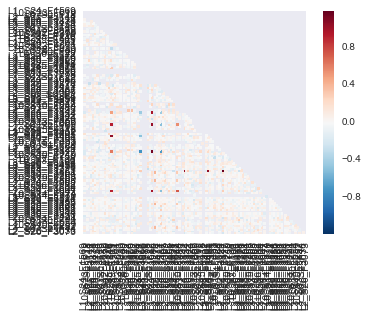

In [373]:
sb.heatmap(pcorr-ncorr, square=True, mask=mask)
corr = pcorr - ncorr

for r in corr.index:
    for c in corr[r].index:
        if r == c:
            continue
        if abs(corr[r][c]) > 0.7:
            print("train['{0}_{1}']= train['{0}'] * train['{1}']".format(r,c))
            #print("train['{0}_{1}'][(np.isnan(train['{0}'])) & (np.isnan(train['{1}'])) ] = True".format(r,c))
            
            #print(r, c, corr[r][c], pcorr[r][c], ncorr[r][c])


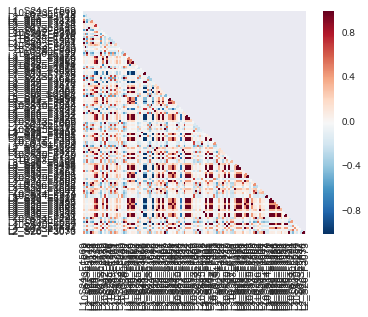

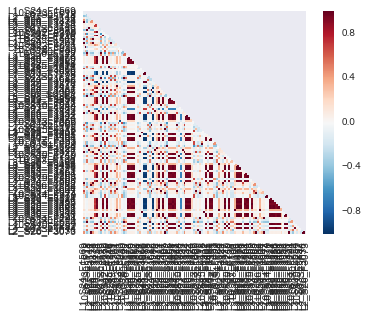

In [233]:
mask = np.zeros((len(colsnum), len(colsnum)))
mask[np.triu_indices_from(mask)]=True
nanpcorr = np.isnan(pos[colsnum]).corr(min_periods=MIN_PERIODS)
sb.heatmap(nanpcorr, square=True, mask=mask)
plt.show()
nanncorr = np.isnan(neg[colsnum]).corr(min_periods=MIN_PERIODS)
sb.heatmap(nanncorr, square=True, mask=mask)
plt.show()


L3_S32_F3850 L3_S33_F3865 -0.705196799737 -0.816311853294 -0.111115053557
train['L3_S32_F3850_L3_S33_F3865']=False
train['L3_S32_F3850_L3_S33_F3865'][(np.isnan(train['L3_S32_F3850'])) & (np.isnan(train['L3_S33_F3865'])) ] = True
L3_S32_F3850 L3_S33_F3859 -0.705196799737 -0.816311853294 -0.111115053557
train['L3_S32_F3850_L3_S33_F3859']=False
train['L3_S32_F3850_L3_S33_F3859'][(np.isnan(train['L3_S32_F3850'])) & (np.isnan(train['L3_S33_F3859'])) ] = True
L3_S32_F3850 L3_S33_F3861 -0.705196799737 -0.816311853294 -0.111115053557
train['L3_S32_F3850_L3_S33_F3861']=False
train['L3_S32_F3850_L3_S33_F3861'][(np.isnan(train['L3_S32_F3850'])) & (np.isnan(train['L3_S33_F3861'])) ] = True
L3_S32_F3850 L3_S33_F3863 -0.705196799737 -0.816311853294 -0.111115053557
train['L3_S32_F3850_L3_S33_F3863']=False
train['L3_S32_F3850_L3_S33_F3863'][(np.isnan(train['L3_S32_F3850'])) & (np.isnan(train['L3_S33_F3863'])) ] = True
L3_S32_F3850 L3_S33_F3855 -0.705196799737 -0.816311853294 -0.111115053557
train['L3_

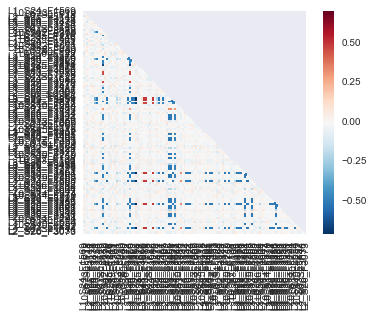

In [291]:

corr = (nanpcorr - nanncorr)
sb.heatmap(corr, square=True, mask=mask)
for r in corr.index:
    for c in corr[r].index:
        if r == c:
            continue
        if abs(corr[r][c]) > 0.7:
            print(r, c, corr[r][c], nanpcorr[r][c], nanncorr[r][c])
            print("train['{0}_{1}']=False".format(r,c))
            print("train['{0}_{1}'][(np.isnan(train['{0}'])) & (np.isnan(train['{1}'])) ] = True".format(r,c))

In [299]:
train['L3_S32_F3850_L3_S33_F3865']=False
train['L3_S32_F3850_L3_S33_F3865'][(np.isnan(train['L3_S32_F3850'])) != (np.isnan(train['L3_S33_F3865'])) ] = True

C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [360]:
print(train[(train['L3_S32_F3850_L3_S33_F3865'] == True) & (train['Response']==1)].shape[0]/
      train[(train['L3_S32_F3850_L3_S33_F3865'] == True) & (train['Response']==0)].shape[0])
print(train[(train['L3_S32_F3850_L3_S33_F3865'] == False) & (train['Response']==1)].shape[0]/
      train[(train['L3_S32_F3850_L3_S33_F3865'] == False) & (train['Response']==0)].shape[0])
#print(train[(train['L3_S32_F3850_L3_S33_F3865'] == False) & (train['Response']==0)].shape)
#print(train[(train['L3_S32_F3850_L3_S33_F3865'] == False) & (train['Response']==1)].shape)
print()
print(pos[(np.isnan(train['L3_S32_F3850'])) != (np.isnan(train['L3_S33_F3865'])) ].shape[0]/pos.shape[0])
print(neg[(np.isnan(train['L3_S32_F3850'])) != (np.isnan(train['L3_S33_F3865'])) ].shape[0]/neg.shape[0])
print(pos[(np.isnan(train['L3_S32_F3850'])) == (np.isnan(train['L3_S33_F3865'])) ].shape[0]/pos.shape[0])
print(neg[(np.isnan(train['L3_S32_F3850'])) == (np.isnan(train['L3_S33_F3865'])) ].shape[0]/neg.shape[0])

0.0057292961613715715
0.0049794327776575015

0.9388839681133747


C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.9303216658034605
0.06111603188662533
0.06967833419653946


C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


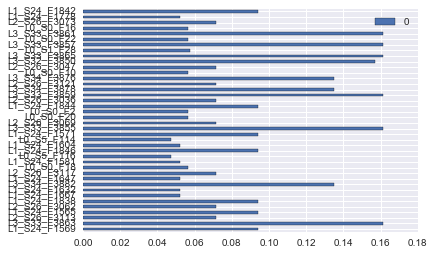

In [371]:
nandiff = {}
for f in colsnum:
    nandiff[f] = abs(pos[np.isnan(pos[f])].shape[0]/pos.shape[0] - 
                 neg[np.isnan(neg[f])].shape[0]/neg.shape[0])
    
    
nandiff = dict(sorted(nandiff.items(), key=lambda x: x[1], reverse=True)[:40])
    
pd.DataFrame.from_dict(nandiff, orient='index').plot.barh()
    


In [543]:
import pickle

m = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\OutputXGBNumCatMax.1\064f991ff533be7fe912c2cfcf286825.XGBClassifier.pkl', 'rb'))


sorted(m.feature_importances_, reverse=True)
pass

In [394]:
def mcc(tn, fp, fn, tp):
    return (tp * tn - fp * fn)/ np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

mcc(235159 , 223 , 1175 , 192)

0.25268361966351388

In [398]:
temp  = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', usecols=['Id', 'Response'])



(1183747, 2)

In [514]:
i = 0
k = 1000000
index = temp.index.tolist()

cv =[i % 5 == 2 for i in index]

cv = temp.loc[cv]
value = []
while i + k < temp.iloc[-1]['Id']:
    value.append(abs(np.sum(temp[(temp['Id'] > i) & (temp['Id'] < i+k)]['Response']) / temp.shape[0]  - 
          np.sum(cv[(cv['Id'] > i) & (cv['Id'] < i+k)]['Response']) / cv.shape[0])*100000)
    print(i, np.sum(temp[(temp['Id'] > i) & (temp['Id'] < i+k)]['Response']) , np.sum(cv[(cv['Id'] > i) & (cv['Id'] < i+k)]['Response']), 
          value[-1])
    i += k
    
print(np.var(value))
    


0 2898 580 0.1693689364286235
1000000 2930 602 6.758630480562444
10.8545919243


In [520]:
i = 0
k = 1000000
index = temp.index.tolist()

cv =[i % 5 == 2 for i in index]
cv = random.sample(index, int(temp.shape[0] * (1.0/5.0)))
cv = temp.loc[cv]
value = []
while i + k < temp.iloc[-1]['Id']:
    value.append(abs(np.sum(temp[(temp['Id'] > i) & (temp['Id'] < i+k)]['Response']) / temp.shape[0]  - 
          np.sum(cv[(cv['Id'] > i) & (cv['Id'] < i+k)]['Response']) / cv.shape[0])*100000)
    print(i, np.sum(temp[(temp['Id'] > i) & (temp['Id'] < i+k)]['Response']) , np.sum(cv[(cv['Id'] > i) & (cv['Id'] < i+k)]['Response']), 
          value[-1])
    i += k
    b
print(np.var(value))
    
    

0 2898 603 9.884299094528593
1000000 2930 591 2.112359535384224
15.1007611277


In [538]:

score = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\OutputXGBTestCV\5f227919d760379616f66ffb65a68654.XGBClassifier.prob')
score.rename(columns={'label':'Id'}, inplace=True)
score.head()
score['Response'] = 0
score['Response'][score['prob'] > 0.19158784240485055] = 1
score[['Id','Response']].to_csv(r'E:\Git\ML\Kaggle_Bosch\Data\OutputXGBTestCV\5f227919d760379616f66ffb65a68654.XGBClassifier.2.txt', header=True, delimiter=',', index=False)


C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [542]:
cv = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\TestCV.1\cv.pkl', 'rb'))
pickle.dump(cv.index, open(r'E:\Git\ML\Kaggle_Bosch\Data\cv2.pkl', 'wb'))



In [550]:
def pr(tn, fp, fn, tp):
    r = tp / (tp + fn)
    p = (tp/(tp + fp)) 
    
    return p,r

print(pr(235161,   221,  1173,    194))
print(pr(235204,    178,   1189,    178))


from sklearn import metrics

metrics.precision_recall_fscore_support([1,1,0,0],[1,0,0,0], labels=[0,1], average='binary')

(0.4674698795180723, 0.14191660570592537)
(0.5, 0.1302121433796635)


(1.0, 0.5, 0.66666666666666663, None)

In [554]:
 p ,r = pr(235161,   221,  1173,    194)
#p,r = pr(235204,    178,   1189,    178)
fscore = 2 * p * r / (p + r)
print(fscore)

0.21773288439955107
